In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
orig=pd.read_csv("D://DataScience/Data/wine.csv")
orig.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
type=orig.Type
type

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Type, Length: 178, dtype: int64

In [4]:
wine=orig.iloc[:,1:]
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Check Multi Collinearity

<AxesSubplot:>

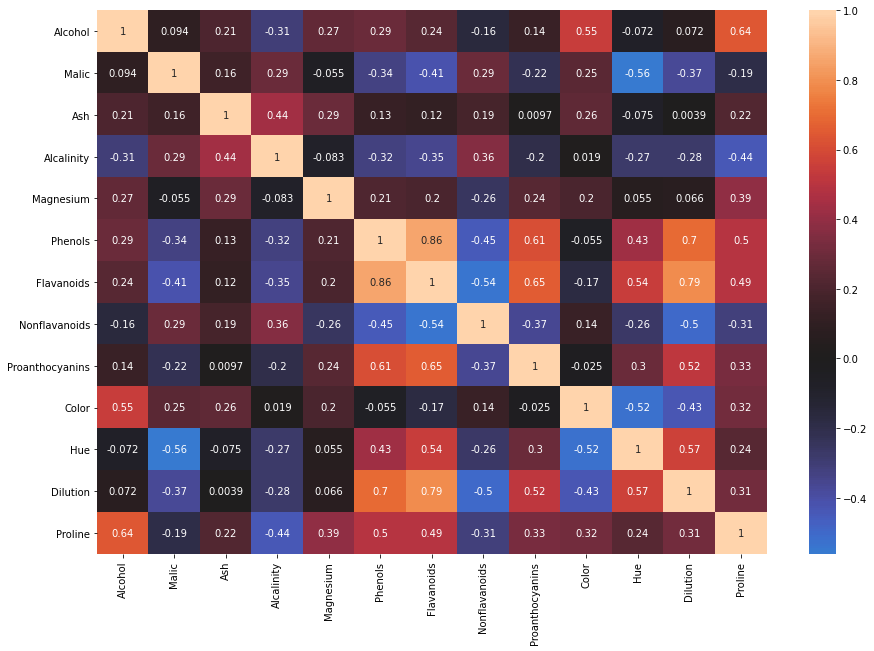

In [5]:
import seaborn as sns
corr=wine.corr()
top_features=corr.index
plt.figure(figsize=(15,10))
sns.heatmap(wine[top_features].corr(),annot=True, center=0)

Flavanoids and Phenols : .86
Flavanoids and Dilution : .79
Phenols and Dilution : .7

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
# Converting into numpy array
WINE = wine.values
WINE

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

### Normalize

In [8]:
# Normalizing the numerical data 
wine_normal = scale(WINE)
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## K means clustering without PCA

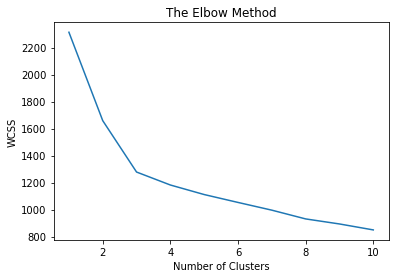

K_Value  3


In [9]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i,random_state=0)
    clf.fit(wine_normal)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

from kneed import DataGenerator, KneeLocator
kl = KneeLocator(
    range(1, 11), WCSS, curve="convex", direction="decreasing"
)
print("K_Value",'',kl.elbow)

For n_clusters = 2 The average silhouette_score is : 0.25931695553182543


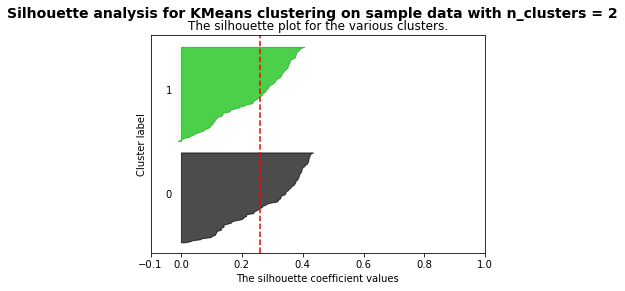

For n_clusters = 3 The average silhouette_score is : 0.2848589191898987


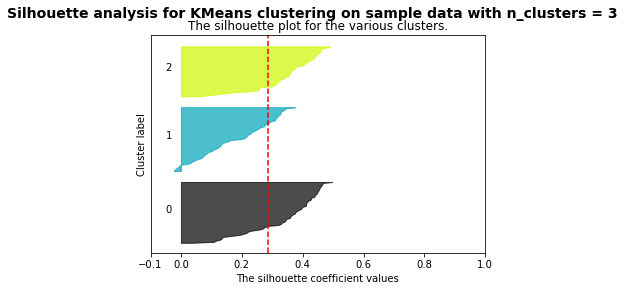

For n_clusters = 4 The average silhouette_score is : 0.24246272803111527


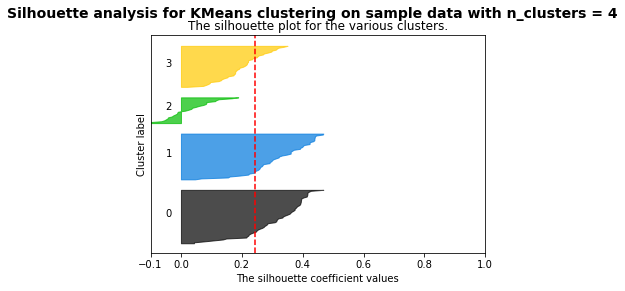

For n_clusters = 5 The average silhouette_score is : 0.22964640104552184


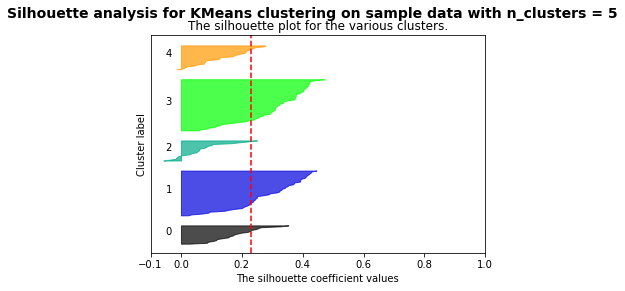

For n_clusters = 6 The average silhouette_score is : 0.1389875970498194


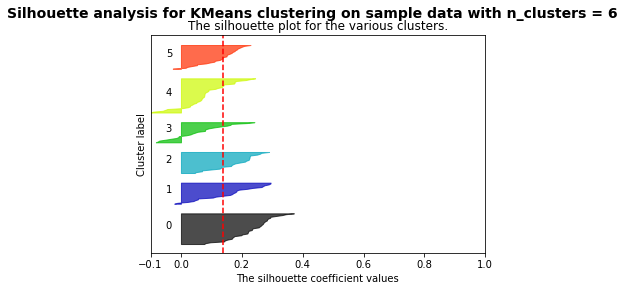

For n_clusters = 7 The average silhouette_score is : 0.18332322545217167


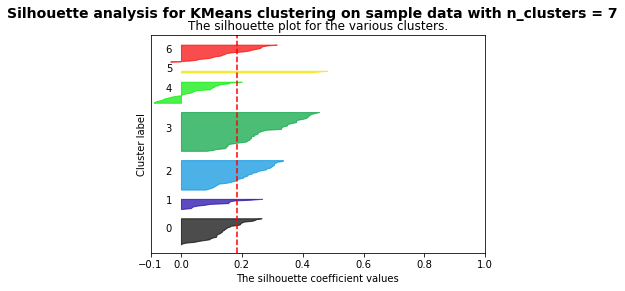

For n_clusters = 8 The average silhouette_score is : 0.1577703502142883


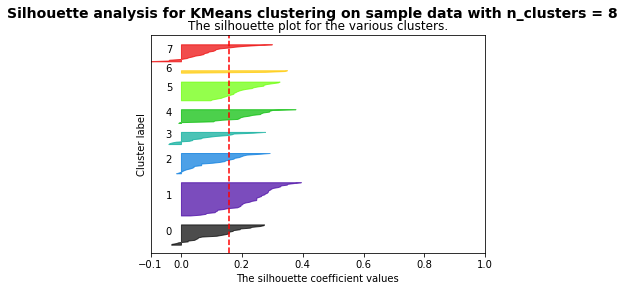

For n_clusters = 9 The average silhouette_score is : 0.13669352742187013


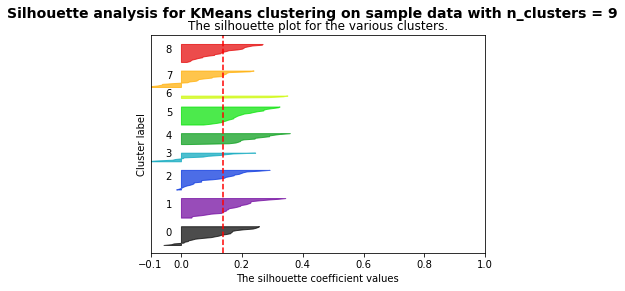

For n_clusters = 10 The average silhouette_score is : 0.13825954550044028


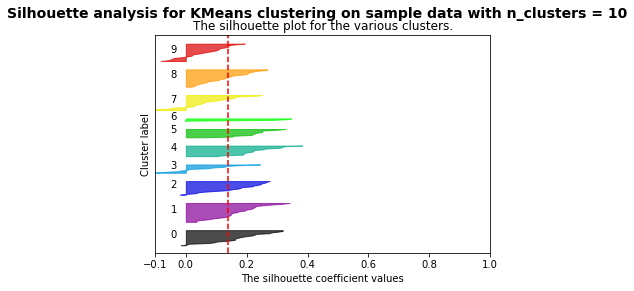

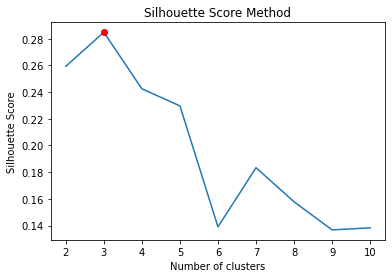

In [10]:
# Silhouette Score Method
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

seed = 0
dict_silhouette_avg = dict()
range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots()
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, wine_normal.shape[0] + (n_clusters + 1) * 10])
    
    estimator = KMeans(n_clusters = n_clusters,random_state=seed)
    cluster_labels = estimator.fit_predict(wine_normal)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(wine_normal,cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    dict_silhouette_avg[n_clusters] = silhouette_avg
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(wine_normal,cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
silhouette_df = pd.Series(dict_silhouette_avg)
ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(3,silhouette_df[3],'ro')

We can choose 3 as clusters

In [11]:
# k-means
from sklearn.cluster import KMeans
KM=KMeans(3,random_state=42)
KM.fit(wine_normal)

KMeans(n_clusters=3, random_state=42)

In [12]:
KM.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [13]:
clusters=pd.Series(KM.labels_)
print("Clusters",'',clusters.unique())

Clusters  [0 2 1]


In [14]:
wine['Cluster']=clusters
# creating a  new column and assigning it to new column 
clusters.value_counts()


2    65
0    62
1    51
dtype: int64

In [15]:
label_pred_KM = KM.labels_
print("Labels predicted by K-Means:",label_pred_KM)
print('Length of labels is same as data entry', label_pred_KM.shape)

centroids_KM= KM.cluster_centers_
print("Shape of centroids_KM",centroids_KM.shape)
print("Centroids:",centroids_KM)

inertia_KM = KM.inertia_
print("Inertia:",inertia_KM)

Labels predicted by K-Means: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Length of labels is same as data entry (178,)
Shape of centroids_KM (3, 13)
Centroids: [[ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]]
Inertia: 1277.928488844643


In [16]:
label_pred_KM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [17]:
wine_cluster=wine
wine_cluster

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [18]:
# Added cluster column
wine_cluster['Cluster']=label_pred_KM
wine_cluster

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


### PCA

Will generate all 13 Principal components and check the varaiance %

In [19]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine_normal)
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_

In [20]:
ind_var=(np.round(var,decimals=4)*100)
ind_var

array([36.2 , 19.21, 11.12,  7.07,  6.56,  4.94,  4.24,  2.68,  2.22,
        1.93,  1.74,  1.3 ,  0.8 ])

In [21]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [22]:
#loadings or weights
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [23]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

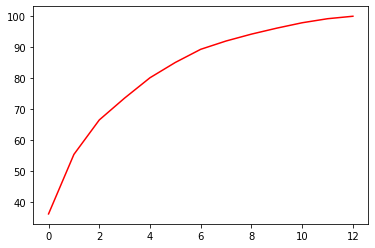

In [24]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

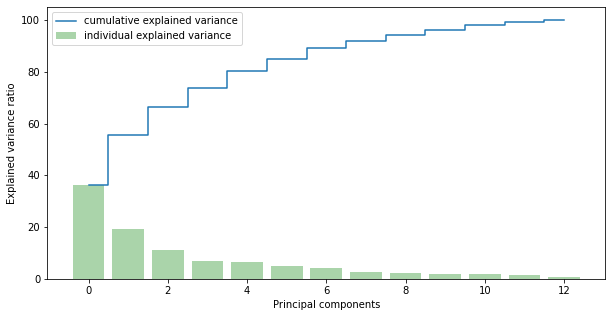

Cumulative explained ratio: [ 36.2   55.41  66.53  73.6   80.16  85.1   89.34  92.02  94.24  96.17
  97.91  99.21 100.01]


In [25]:
# Cumulative and Individual variance
plt.figure(figsize=(10, 5))
plt.bar(range(len(ind_var)), 
        ind_var, 
        alpha=0.3333, 
        align='center', 
        label='individual explained variance', 
        color = 'g')
plt.step(range(len(var1)),
         var1, 
         where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

#cum_var_ratio = np.cumsum(var_ratio)
print("Cumulative explained ratio:",var1)

From the above inference, the first 6 PCs explain 85.1% varaince

In [26]:
pca_final = PCA(n_components = 6)
pca_final_values = pca_final.fit_transform(wine_normal)
# The amount of variance that each PCA explains is 
var2 = pca.explained_variance_ratio_

In [43]:
wine_pca=pd.DataFrame(data=pca_final_values, columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
wine_pca

,pc1,pc2,pc3,pc4,pc5,pc6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392


In [56]:
# data for K-means
wine_pca_k=wine_pca
wine_pca_k

,pc1,pc2,pc3,pc4,pc5,pc6,Cluster_pca,Type,cluster_orig
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0,1,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0,1,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0,1,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,0,1,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0,1,0
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0,1,0
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0,1,0
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0,1,0
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0,1,0
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,0,1,0


In [57]:
#Data for Hierarchical
wine_pca_h=pd.DataFrame(data=pca_final_values, columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
wine_pca_h

,pc1,pc2,pc3,pc4,pc5,pc6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392


## K means for PCAs

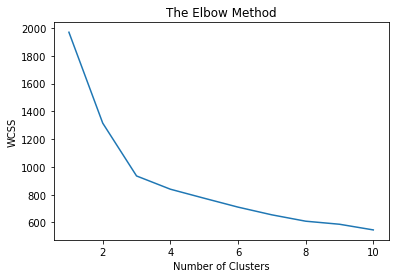

Clusters  3


In [46]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i,random_state=0)
    clf.fit(wine_pca_k)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

from kneed import DataGenerator, KneeLocator
kl = KneeLocator(
    range(1, 11), WCSS, curve="convex", direction="decreasing"
)
print("Clusters",'',kl.elbow)

For n_clusters = 2 The average silhouette_score is : 0.26831340971052126


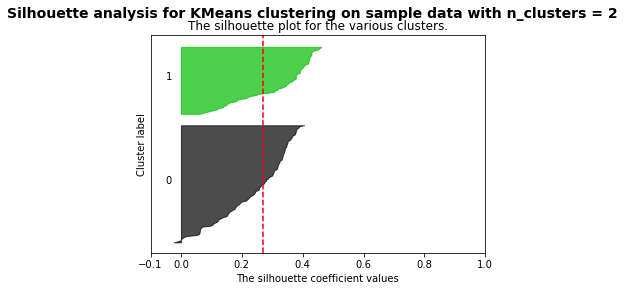

For n_clusters = 3 The average silhouette_score is : 0.2848589191898987


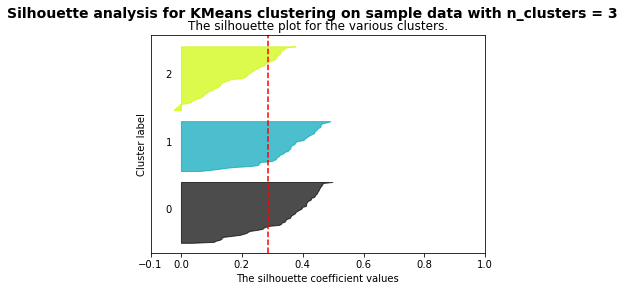

For n_clusters = 4 The average silhouette_score is : 0.24766819331451156


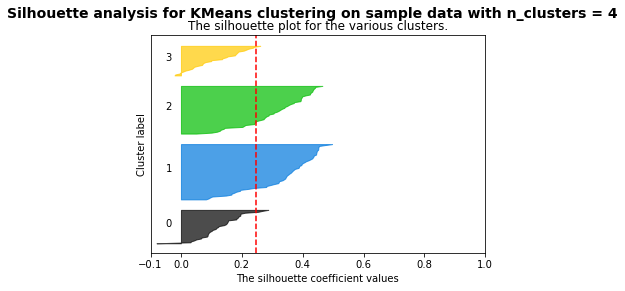

For n_clusters = 5 The average silhouette_score is : 0.18123387351307382


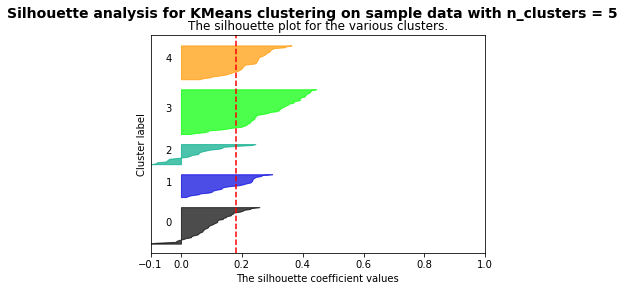

For n_clusters = 6 The average silhouette_score is : 0.1845325006430341


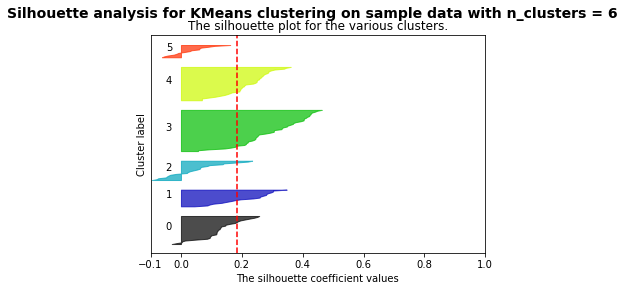

For n_clusters = 7 The average silhouette_score is : 0.19761050074679723


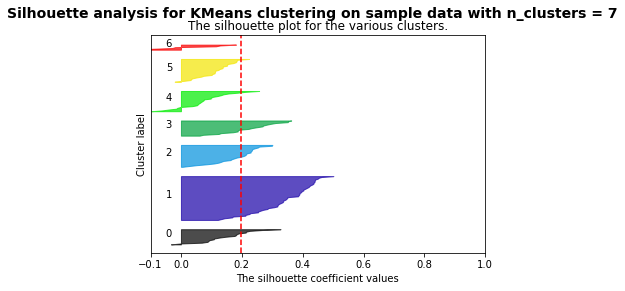

For n_clusters = 8 The average silhouette_score is : 0.1529869728447328


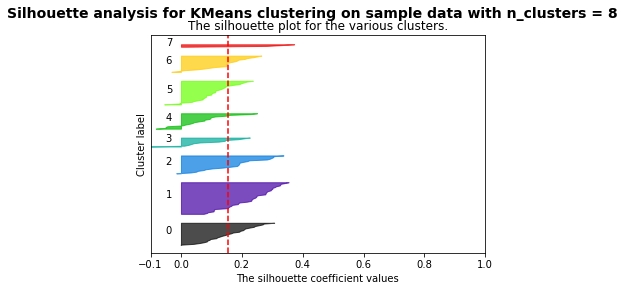

For n_clusters = 9 The average silhouette_score is : 0.1432968813961391


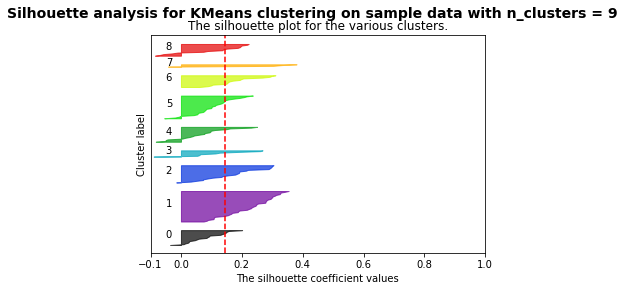

For n_clusters = 10 The average silhouette_score is : 0.13797116345155405


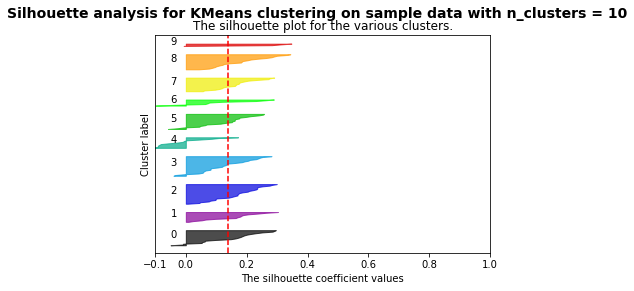

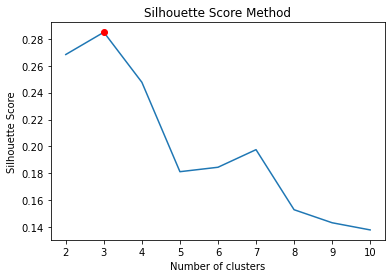

In [47]:
# Silhouette Score Method
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

seed = 0
dict_silhouette_avg = dict()
range_n_clusters = range(2,11)

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots()
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, wine_pca_k.shape[0] + (n_clusters + 1) * 10])
    
    estimator = KMeans(n_clusters = n_clusters,random_state=seed)
    cluster_labels = estimator.fit_predict(wine_pca_k)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(wine_normal,cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    dict_silhouette_avg[n_clusters] = silhouette_avg
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(wine_normal,cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
silhouette_df = pd.Series(dict_silhouette_avg)
ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(3,silhouette_df[3],'ro')

From the above we can conculde that 3 clusters can be formed

In [48]:
# K-Means + PCA
KM1 = KMeans(n_clusters = 3, random_state=seed)
res = KM1.fit(wine_pca_k)
label_pred_KM_PCA = KM1.predict(wine_pca_k)
print("Labels predicted by KM+PCA:",label_pred_KM_PCA)

Labels predicted by KM+PCA: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [49]:
clusters_pca=pd.Series(label_pred_KM_PCA)
print("Clusters_pca",'',clusters_pca.unique())
clusters_pca.value_counts()

Clusters_pca  [0 2 1]


2    65
0    62
1    51
dtype: int64

In [50]:
# Added cluster pca
wine_pca_k['Cluster_pca']=label_pred_KM_PCA
wine_pca_k

,pc1,pc2,pc3,pc4,pc5,pc6,Cluster_pca
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,0


In [35]:
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [51]:
# # Added Type column to pca data
wine_pca_k['Type']=orig.Type
wine_pca_k

,pc1,pc2,pc3,pc4,pc5,pc6,Cluster_pca,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,0,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0,1
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0,1
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0,1
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0,1
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0,1
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,0,1


In [52]:
# Added cluster data before PCA
wine_pca_k['cluster_orig']=wine_cluster.Cluster
wine_pca_k

,pc1,pc2,pc3,pc4,pc5,pc6,Cluster_pca,Type,cluster_orig
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0,1,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0,1,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0,1,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,0,1,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0,1,0
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0,1,0
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0,1,0
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0,1,0
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0,1,0
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,0,1,0


Based on analysis
Row 61,73,83,95,118.,121 has diiferent values between the original data "Type" column to "Cluster_pca" column
Row 61,73,83,95,118.,121 has diiferent values between the original data "Type" column to "Cluster_orig" column


C:\Users\jeysu_000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


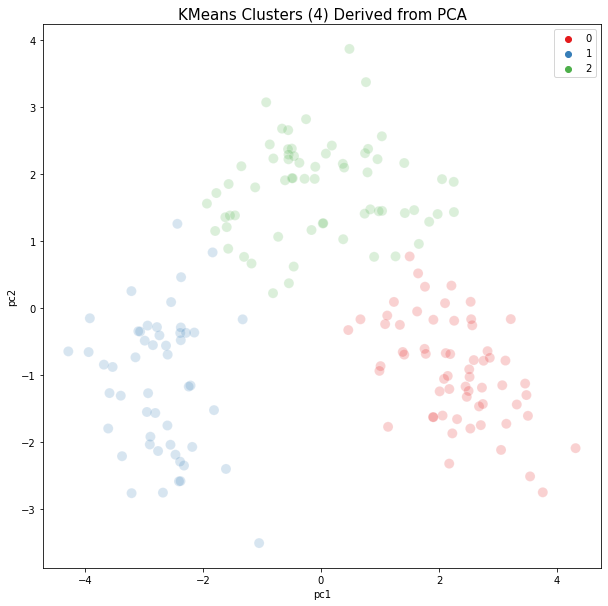

In [53]:
# k-Means clusters on PCA
plt.figure(figsize = (10,10))
sns.scatterplot(wine_pca_k.iloc[:,0],wine_pca_k.iloc[:,1], hue=wine_pca_k.Cluster_pca, palette='Set1', s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from PCA', fontsize=15)
plt.legend()
plt.show()

## Hierarchical Clustering for PCAs

In [58]:
wine_pca_h

,pc1,pc2,pc3,pc4,pc5,pc6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392


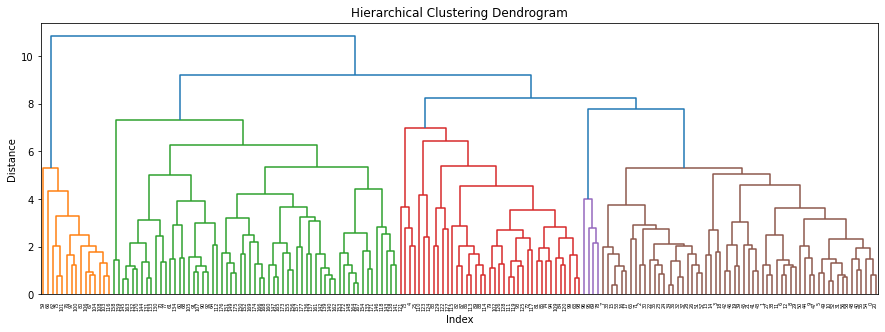

In [60]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(wine_pca_h, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Based on dentrogram with complete mode 5 clusters are possible

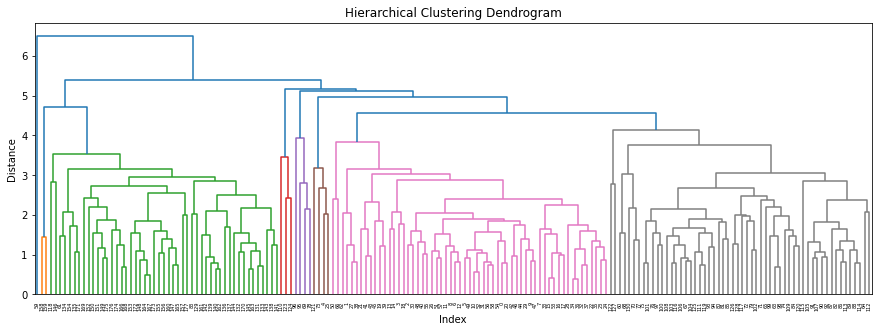

In [62]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(wine_pca_h, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Based on dentrogram with average mode 3 clusters are possible

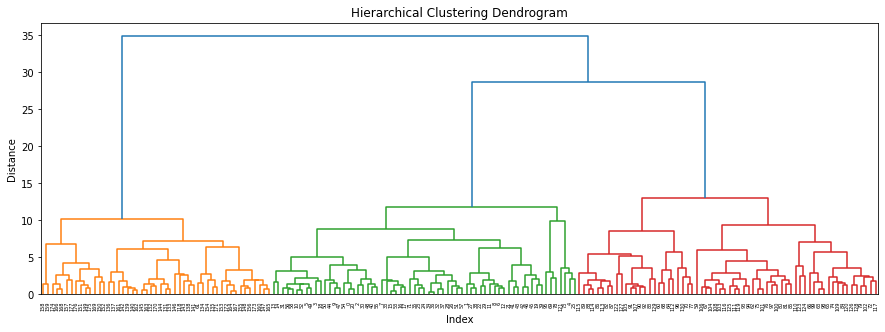

In [63]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(wine_pca_h, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

Based on dentrogram with ward mode 3 clusters are possible

In [75]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(wine_pca_h) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
wine_pca_h['clust']=cluster_labels # creating a  new column and assigning it to new column 
wine_pca_h

,pc1,pc2,pc3,pc4,pc5,pc6,clust
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,2
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,0


In [76]:
#clusters_pca=pd.Series(label_pred_KM_PCA)
#print("Clusters_pca",'',clusters_pca.unique())
cluster_labels.value_counts()

0    96
1    40
2    23
3    15
4     4
dtype: int64

In [77]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=3, linkage='average',affinity = "euclidean").fit(wine_pca_h) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
wine_pca_h['clust']=cluster_labels # creating a  new column and assigning it to new column 
wine_pca_h

,pc1,pc2,pc3,pc4,pc5,pc6,clust
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,0


In [78]:
cluster_labels.value_counts()

0    173
2      4
1      1
dtype: int64

In [79]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=3, linkage='ward',affinity = "euclidean").fit(wine_pca_h) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
wine_pca_h['clust']=cluster_labels # creating a  new column and assigning it to new column 
wine_pca_h

,pc1,pc2,pc3,pc4,pc5,pc6,clust
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,0


In [80]:
cluster_labels.value_counts()

0    66
2    60
1    52
dtype: int64